In [23]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

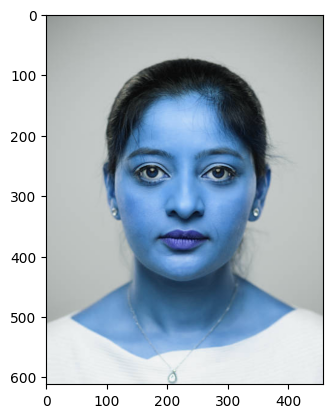

In [24]:
# Import image
img = cv2.imread('image.jpg', 1)
plt.imshow(img)

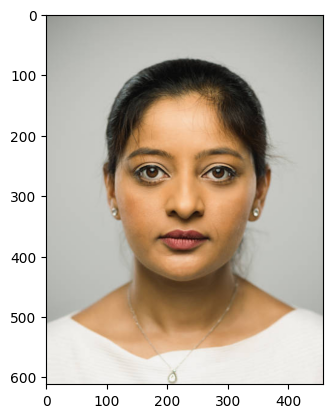

In [25]:

#BGR TO RGB FUNCTION

h= img.shape[0]
w= img.shape[1]
d= img.shape[2]

def bgr_to_rgb(img):
    img = np.array(img)
    b = img[0][0][0]
    g = img[0][0][1]
    r = img[0][0][2]

    img = np.uint8([[[r,g,b]]])
    return img
rgbImg = copy.deepcopy(img)
for y in range(0,h):
    for x in range(0,w):
        
        dot = img[y][x]
        rgbImg[y][x] = bgr_to_rgb([[dot]])
        
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        

plt.imshow(img)


In [26]:
def rgb_2_hsv(rgb3d):
    # Used to convert the rgb value to hsv value
    # input :3-D RGB values
    # output:3-D HSV values
    rgb = rgb3d[0][0] #getting the rgb 1-D array from 3-D array
    rgb = rgb/255

    # Initialising the hsv values
    h=0.0
    s=0.0
    v=0.0
    #Finding the MAX and MIN values
    v=np.max(rgb)
    v_min=np.min(rgb)

    # setting saturation values
    if v > 0.0:
        s = (v-v_min)/v
    else:
        s = 0.0
    
    # calculating v-vmin 
    diff = v-v_min
    # Are r,g,b equal. 
    if(rgb[0] == rgb[1] and rgb[1] == rgb[2]):
        h = 0
    #the point within +/- 60 degrees of the red axis
    elif(rgb[0] == v):
        h = 60 * (rgb[1] - rgb[2]) / diff
    # the point within +/- 60 degrees of the green axis
    elif(rgb[1] == v):
        h = 120 + 60 * (rgb[2] - rgb[0]) / diff
    # the point within +/- 60 degrees of the blue axis
    elif(rgb[2] == v):
        h = 240 + 60 * (rgb[0] - rgb[1]) / diff
    h=round(h/2)
    #Normalizing the color values to cv2 standards
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))
    return np.array([[[h,s,v]]])

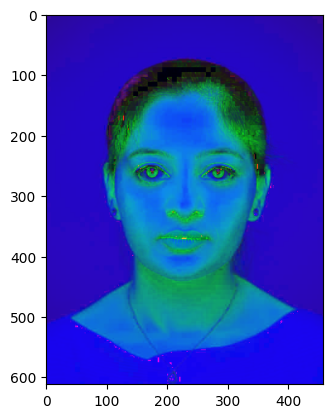

In [27]:
hsvImg = copy.deepcopy(rgbImg)
for y in range(0,h):
    for x in range(0,w):
        
        dot = rgbImg[y][x]
        hsvImg[y][x] = rgb_2_hsv([[dot]])

plt.imshow(hsvImg)

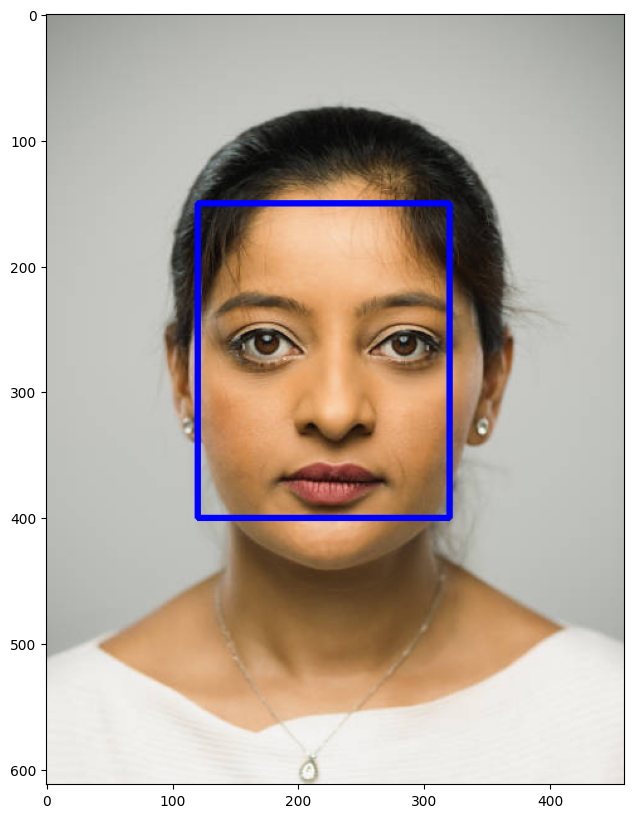

In [28]:
# Convert back to BGR
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Top left of rectangle.
top_left = (320, 150)

# Bottom right of rectangle.
bottom_right = (120, 400)

# Color
rect_color = (255,0,0)

# Thickness of line
thickness = 3

# Apply rectangle.
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Convert back to RGB
img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)

# Make image larger on plot.
fig = plt.figure(figsize=(10,10))

# Plot image.
plt.imshow(img_rect)

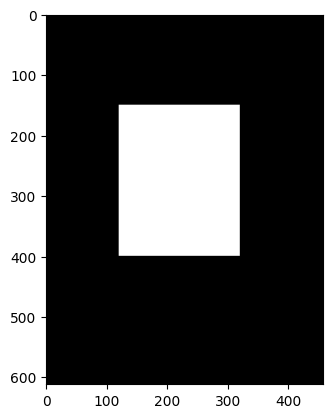

In [29]:
# Top left of rectangle.
# top_left = (1250, 1000)

# Bottom right of rectangle.
# bottom_right = (1800, 1600)


# Create an black mask.
mask = np.zeros(img.shape[:2], np.uint8)

# Add the white portion of the mask.
mask[150:400, 120:320] = 255

# Plot mask.
plt.imshow(mask, cmap="gray")

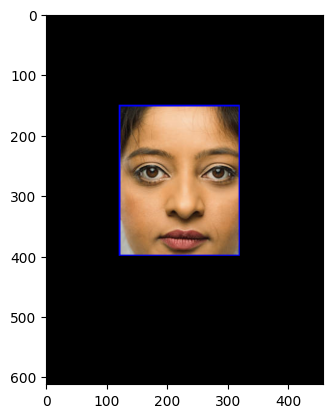

In [30]:
# Reimport image
img = cv2.bitwise_and(img,img, mask = mask)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [31]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

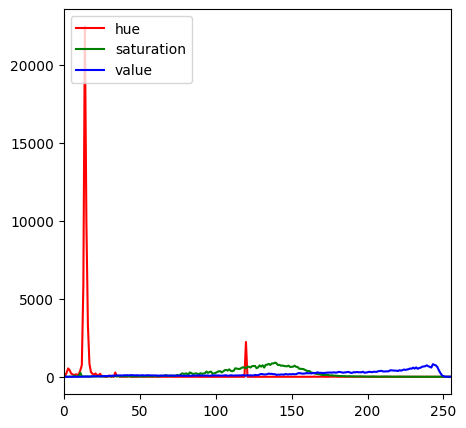

In [32]:
fig = plt.figure(figsize=(5,5))

# Plot the hue.
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

# Plot the saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

# Plot the value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')
plt.show()

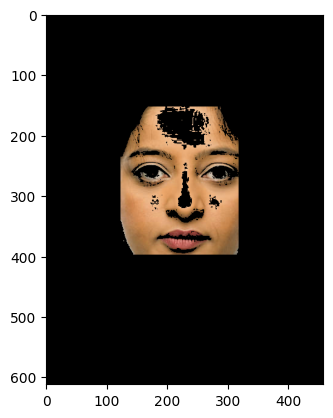

In [33]:
# Minimum and maximum HSV values.
min_HSV = np.array([0,30,100], np.uint8)
max_HSV = np.array([25,170,240], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Plot masked image.
plt.imshow(skinHSV)